# Digital Signal Processing Tutorial

JYU

JOHANNES KEPLER UNIVERSITY LINZ $(382.047 / 64 / 66 / 67 / 68 / 69 / 70), 2024 S$

Bernhard Plaimer, Matthias Wagner

Assignment 4

Reconstruction, DFT, FFT, STFT

Information about assignments and in particular on Moodle submission modalities can be found in DSP-Tutorial_2024S_Courselnfo.pdf. Submission deadline is Tue, June 11, 2024, 08:00.

# Exercise 1 Reconstruction (15\%) 

Consider the analog signal

$$
x(t)=1+0.5 \cos \left(2 \pi f_{1} t\right)+2 \sin \left(2 \pi f_{2} t\right)+\sin \left(2 \pi f_{3} t\right)
$$

with $f_{1}=2 k \mathrm{kz}, f_{2}=4 \mathrm{kHz}$ and $f_{3}=6 \mathrm{kHz}$.

a) Sketch the Fourier transform of $x(t)$ and plot the analog signal $x(t)$ in Matlab using a timevector $t=0: 1 e-6: 1 e-3$.


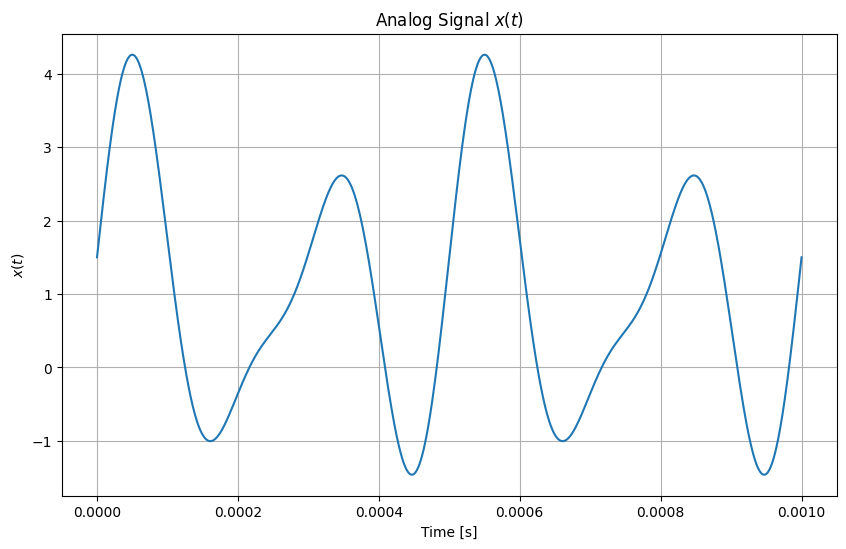

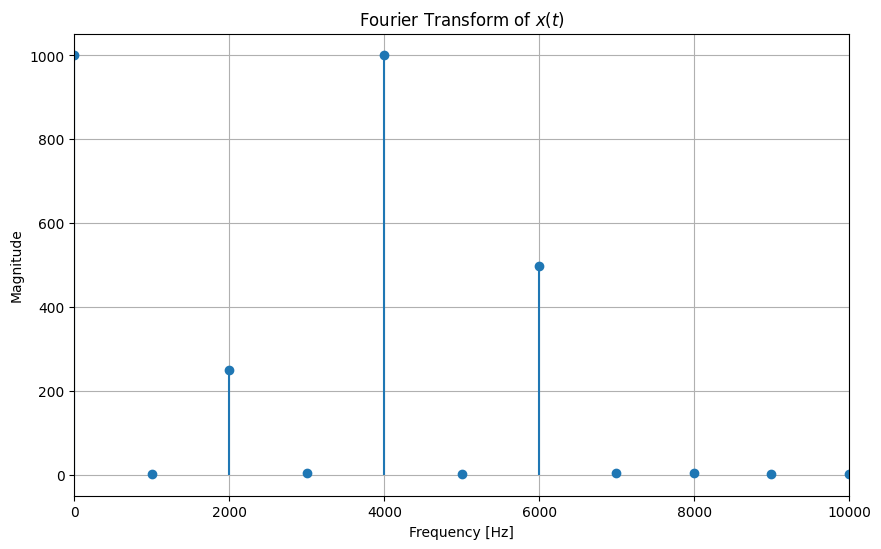

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create fig directory if it doesn't exist
if not os.path.exists('fig'):
    os.makedirs('fig')

# Constants
f1 = 2e3  # 2 kHz
f2 = 4e3  # 4 kHz
f3 = 6e3  # 6 kHz
t = np.arange(0, 1e-3, 1e-6)  # time vector from 0 to 1 ms with 1 us step

# Signal definition
x_t = 1 + 0.5 * np.cos(2 * np.pi * f1 * t) + 2 * np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)

# Plotting the analog signal
plt.figure(figsize=(10, 6))
plt.plot(t, x_t)
plt.title('Analog Signal $x(t)$')
plt.xlabel('Time [s]')
plt.ylabel('$x(t)$')
plt.grid(True)
plt.savefig('fig/ex1_a_plot.png')
plt.show()

# Fourier Transform
X_f = np.fft.fft(x_t)
f = np.fft.fftfreq(len(t), d=1e-6)  # frequency vector

# Plotting the Fourier Transform (magnitude spectrum) as stem plot
plt.figure(figsize=(10, 6))
plt.stem(f[:len(f)//2], np.abs(X_f)[:len(f)//2], basefmt=" ")
plt.title('Fourier Transform of $x(t)$')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 10e3)  # Limit the x-axis to 10 kHz
plt.grid(True)
plt.savefig('fig/ex1_a_fft_stem.png')
plt.show()


b) Sample the analog signal $x(t)$ with sampling frequencies $f_{s 1}=9 \mathrm{kHz}$ and $f_{s 2}=14 \mathrm{kHz}$, which yield $x_{1}[n]$ and $x_{2}[n]$, respectively. Sketch the corresponding DTFT spectra.


/var/folders/bt/2nhmyw717njc3db3_54g8yb80000gn/T/ipykernel_95367/1400102201.py:46: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(omega1, np.abs(X1), basefmt=" ", use_line_collection=True)


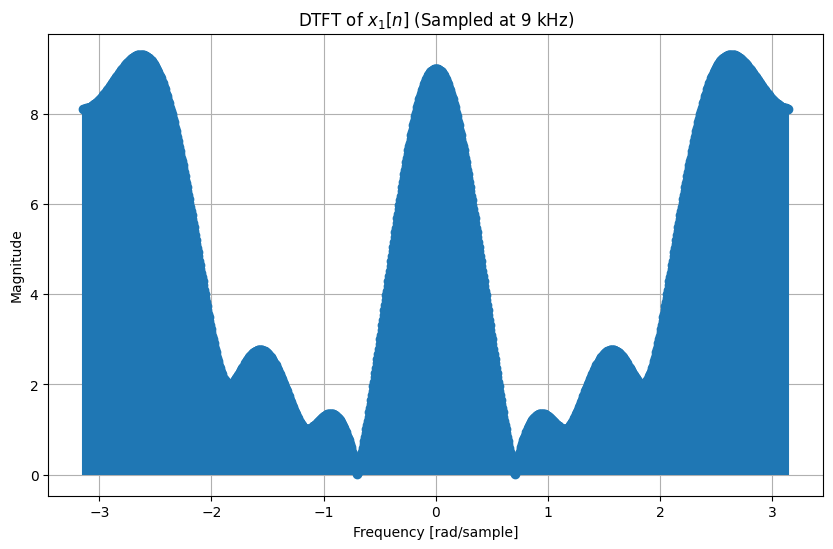

/var/folders/bt/2nhmyw717njc3db3_54g8yb80000gn/T/ipykernel_95367/1400102201.py:56: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(omega2, np.abs(X2), basefmt=" ", use_line_collection=True)


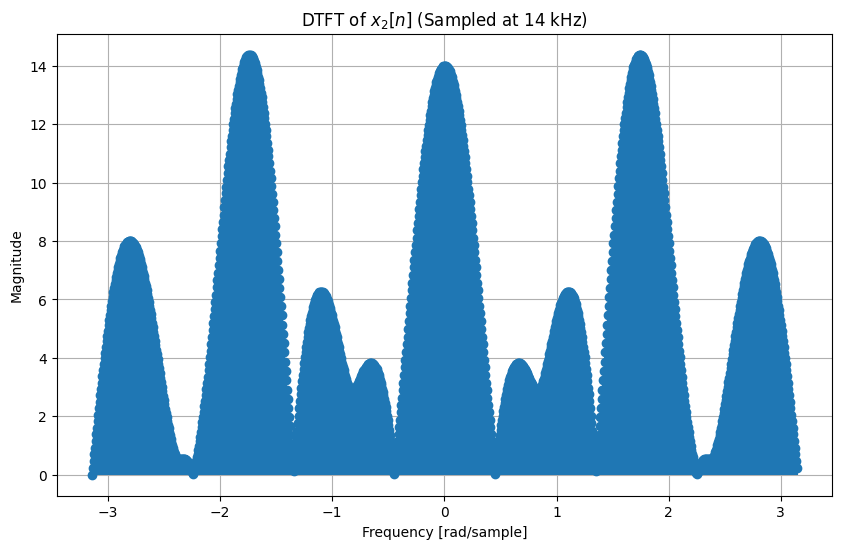

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create fig directory if it doesn't exist
if not os.path.exists('fig'):
    os.makedirs('fig')

# Constants
f1 = 2e3  # 2 kHz
f2 = 4e3  # 4 kHz
f3 = 6e3  # 6 kHz
t = np.arange(0, 1e-3, 1e-6)  # time vector from 0 to 1 ms with 1 us step

# Signal definition
x_t = 1 + 0.5 * np.cos(2 * np.pi * f1 * t) + 2 * np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)

# Sampling frequencies
fs1 = 9e3  # 9 kHz
fs2 = 14e3  # 14 kHz

# Sampling intervals
T1 = 1 / fs1
T2 = 1 / fs2

# Sampled signals
n1 = np.arange(0, t[-1], T1)
x1_n = 1 + 0.5 * np.cos(2 * np.pi * f1 * n1) + 2 * np.sin(2 * np.pi * f2 * n1) + np.sin(2 * np.pi * f3 * n1)

n2 = np.arange(0, t[-1], T2)
x2_n = 1 + 0.5 * np.cos(2 * np.pi * f1 * n2) + 2 * np.sin(2 * np.pi * f2 * n2) + np.sin(2 * np.pi * f3 * n2)

# DTFT computation function
def dtft(x, N=1024):
    X = np.fft.fft(x, N)
    X = np.fft.fftshift(X)  # Shift zero frequency component to center
    omega = np.linspace(-np.pi, np.pi, N)
    return omega, X

# Compute DTFT
omega1, X1 = dtft(x1_n)
omega2, X2 = dtft(x2_n)

# Plotting DTFT of x1[n]
plt.figure(figsize=(10, 6))
plt.stem(omega1, np.abs(X1), basefmt=" ", use_line_collection=True)
plt.title('DTFT of $x_1[n]$ (Sampled at 9 kHz)')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.savefig('fig/ex1_b_dtft_x1.png')
plt.show()

# Plotting DTFT of x2[n]
plt.figure(figsize=(10, 6))
plt.stem(omega2, np.abs(X2), basefmt=" ", use_line_collection=True)
plt.title('DTFT of $x_2[n]$ (Sampled at 14 kHz)')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.savefig('fig/ex1_b_dtft_x2.png')
plt.show()


c) After ideal reconstruction you end up with the analog signals $x_{1}(t)$ and $x_{2}(t)$. Sketch the reconstructed analog spectra. Plot the reconstructed time-domain signal. Compare your results with point a).


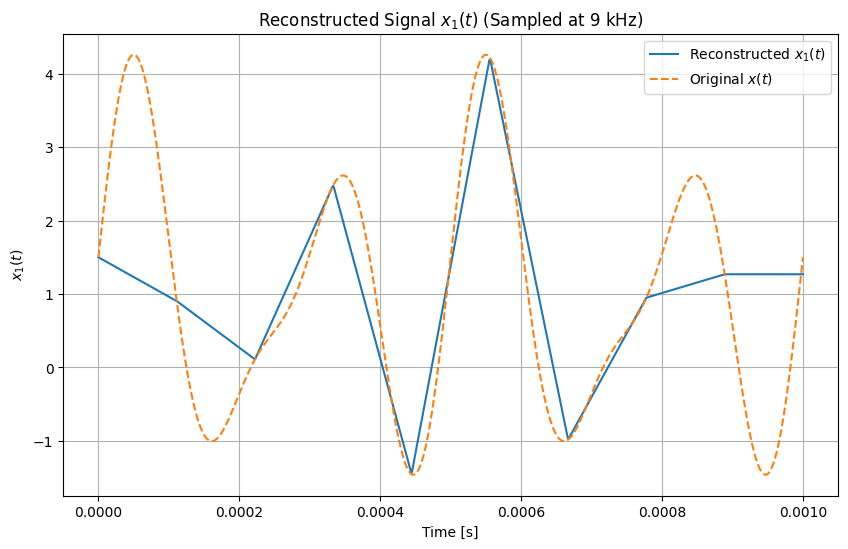

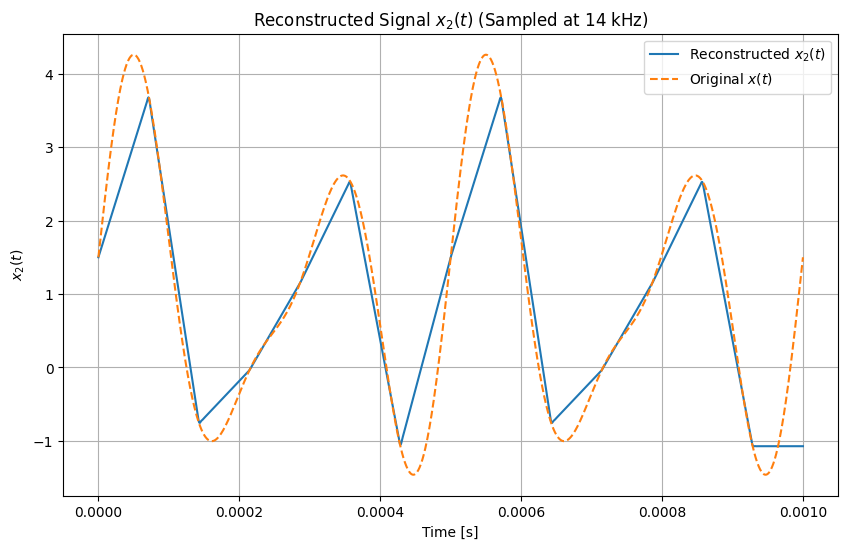

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import os

# Create fig directory if it doesn't exist
if not os.path.exists('fig'):
    os.makedirs('fig')

# Constants
f1 = 2e3  # 2 kHz
f2 = 4e3  # 4 kHz
f3 = 6e3  # 6 kHz
t = np.arange(0, 1e-3, 1e-6)  # time vector from 0 to 1 ms with 1 us step

# Original Signal
x_t = 1 + 0.5 * np.cos(2 * np.pi * f1 * t) + 2 * np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)

# Sampling frequencies
fs1 = 9e3  # 9 kHz
fs2 = 14e3  # 14 kHz

# Sampling intervals
T1 = 1 / fs1
T2 = 1 / fs2

# Sampled signals
n1 = np.arange(0, t[-1], T1)
x1_n = 1 + 0.5 * np.cos(2 * np.pi * f1 * n1) + 2 * np.sin(2 * np.pi * f2 * n1) + np.sin(2 * np.pi * f3 * n1)

n2 = np.arange(0, t[-1], T2)
x2_n = 1 + 0.5 * np.cos(2 * np.pi * f1 * n2) + 2 * np.sin(2 * np.pi * f2 * n2) + np.sin(2 * np.pi * f3 * n2)

# Ideal reconstruction using low-pass filter
def ideal_reconstruction(x_n, fs, t):
    nyquist_rate = fs / 2.0
    # Design an ideal low-pass filter
    b, a = butter(4, 0.5, btype='low')  # 0.5 is the normalized cutoff frequency
    # Upsample and filter the signal
    x_reconstructed = np.interp(t, np.arange(0, len(x_n)) * (1 / fs), x_n)
    x_reconstructed = filtfilt(b, a, x_reconstructed)
    return x_reconstructed

x1_t_reconstructed = ideal_reconstruction(x1_n, fs1, t)
x2_t_reconstructed = ideal_reconstruction(x2_n, fs2, t)

# Plotting the reconstructed signals
plt.figure(figsize=(10, 6))
plt.plot(t, x1_t_reconstructed, label='Reconstructed $x_1(t)$')
plt.plot(t, x_t, label='Original $x(t)$', linestyle='--')
plt.title('Reconstructed Signal $x_1(t)$ (Sampled at 9 kHz)')
plt.xlabel('Time [s]')
plt.ylabel('$x_1(t)$')
plt.legend()
plt.grid(True)
plt.savefig('fig/ex1_c_reconstructed_x1.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, x2_t_reconstructed, label='Reconstructed $x_2(t)$')
plt.plot(t, x_t, label='Original $x(t)$', linestyle='--')
plt.title('Reconstructed Signal $x_2(t)$ (Sampled at 14 kHz)')
plt.xlabel('Time [s]')
plt.ylabel('$x_2(t)$')
plt.legend()
plt.grid(True)
plt.savefig('fig/ex1_c_reconstructed_x2.png')
plt.show()


## Exercise 2 DFT Theory (20\%)

100 values of an analog signal $x(t)$ were measured with a sampling time of $1 \mathrm{~ms}$, leading to the discrete-time signal $x[n]$. This time domain signal $x[n]$ is transformed to frequency domain using the DFT/FFT, i.e., a 100-point DFT/FFT is calculated.

(a) What is the frequency spacing between two neighboring spectral points in the DFT spectrum, i.e., what is the frequency resolution?

(b) What is the "period" of the DFT spectrum in terms of samples, in terms of frequency, and in terms of normalized angular frequency?

We now append zeros to the discrete-time signal $x[n]$ to obtain a signal that has a length of 128 samples.

(c) Why do we append exactly so many zeros, so that a total signal of length $128=2^{7}$ results?

(d) What is the frequency spacing between two neighboring spectral points in the DFT spectrum now?

(e) How can the changed distance between two neighboring spectral points be interpreted?

## E#xercise 3 FFT in Image Processing (15\%)

In image processing, besides other methods, also the FFT can be utilized to conduct edge detection. To this end, a two-dimensional FFT (MATLAB command: $f f t 2$ ) is calculated from an image to transform it from spatial domain to frequency domain. Here, edges in an image produce high frequencies in the corresponding spectrum.

In this exercise, you should make the edges of an image visible. Start by making yourself familiar with the MatLAB script fft\_edge\_detection. Now filter the image in frequency domain, such that the edges become visible after a transformation back to spatial domain. Describe your approach and justify why it works. A solution could look the one depicted in Fig. 1.

![](https://cdn.mathpix.com/cropped/2024_05_20_fb408b21a3cafdbd1f66g-2.jpg?height=480&width=1612&top_left_y=771&top_left_x=220)

Figure 1 Example for edge detection with the FFT.


/var/folders/bt/2nhmyw717njc3db3_54g8yb80000gn/T/ipykernel_95367/96566835.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(image_path, mode='L')


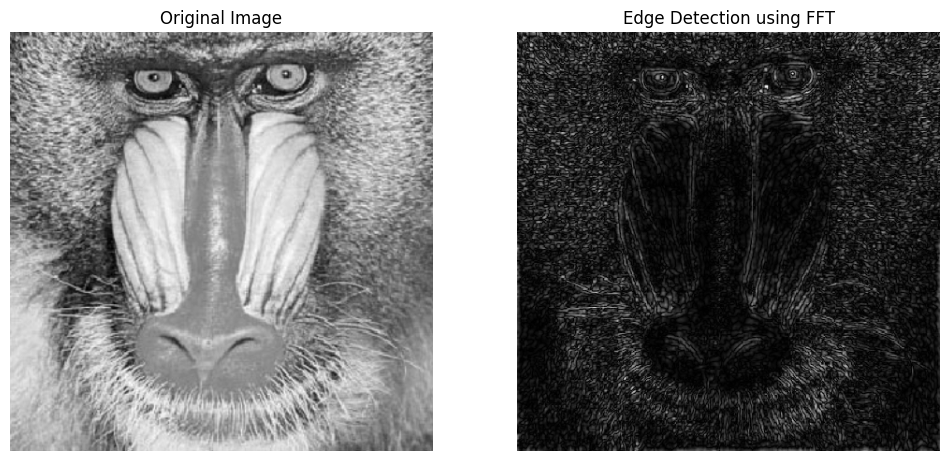

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift
from imageio import imread

# Read the image
image_path = 'monkey.png'
image = imread(image_path, mode='L')

# Perform the 2D FFT
image_fft = fft2(image)
image_fft_shifted = fftshift(image_fft)  # Shift the zero frequency component to the center

# Create a high-pass filter
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2  # Center of the image

# Create a mask with high value at edges
high_pass_mask = np.ones((rows, cols), dtype=np.float32)
high_pass_radius = 30  # Adjust the radius to control the filter size
center_radius = high_pass_radius

for i in range(rows):
    for j in range(cols):
        if np.sqrt((i - crow)**2 + (j - ccol)**2) < center_radius:
            high_pass_mask[i, j] = 0

# Apply the high-pass filter
filtered_fft = image_fft_shifted * high_pass_mask

# Inverse FFT to transform back to the spatial domain
filtered_fft_shifted_back = fftshift(filtered_fft)
image_filtered = np.abs(ifft2(filtered_fft_shifted_back))

# Plot the original and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_filtered, cmap='gray')
plt.title('Edge Detection using FFT')
plt.axis('off')

# Save the plot for LaTeX inclusion
plt.savefig('fig/ex3_edge_detection_fft.png')
plt.show()


## Exercise 4 FFT in Audio Signal Processing - Short Time Fourier Transform (30\%)

In the Dual Tone Multiple Frequency (DTMF) method, each of the 16 possible information symbols $q \in\{0,1,2,3,4,5,6,7,8,9, A, B, C, D, *, \#\}$ is represented by a superposition of two sinusoidal audio signals with different frequencies. The assignment of every symbols to the two frequencies contained in the corresponding audio signal is given in Tab. 1. The duration of a single symbol is $70 \mathrm{~ms}$, and the audio signals of two symbols are separated by a pause of $30 \mathrm{~ms}$. The file $\mathrm{dtmf}$. wav contains a signal consisting of a sequence DTMF signals corresponding to a sequence of randomly chosen symbols, where the signal has been generated with a sampling frequency of $f_{s}=8 \mathrm{kHz}$.

Table 1 DTMF frequencies.

|  | $1209 \mathrm{~Hz}$ | $1336 \mathrm{~Hz}$ | $1477 \mathrm{~Hz}$ | $1633 \mathrm{~Hz}$ |
| :---: | :---: | :---: | :---: | :---: |
| $697 \mathrm{~Hz}$ | 1 | 2 | 3 | $A$ |
| $770 \mathrm{~Hz}$ | 4 | 5 | 6 | $B$ |
| $852 \mathrm{~Hz}$ | 7 | 8 | 9 | $C$ |
| $941 \mathrm{~Hz}$ | $*$ | 0 | $\#$ | $D$ |

(a) Write a MatLAB script, where you read in the signal and the sampling frequency from the file dtmf.wav. Hint: the MatLaB function audioread might be useful. Plot a $300 \mathrm{~ms}$ long segment of the signal and put the resulting plot into your protocol (including a correct labeling of the axes, etc.). Given this signal segment in time domain, can you make any statement which symbols are contained in this segment?

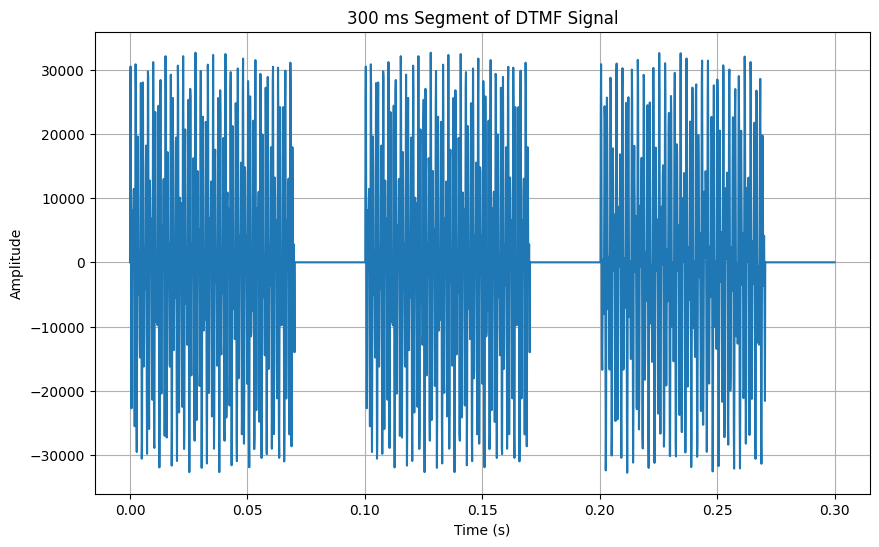

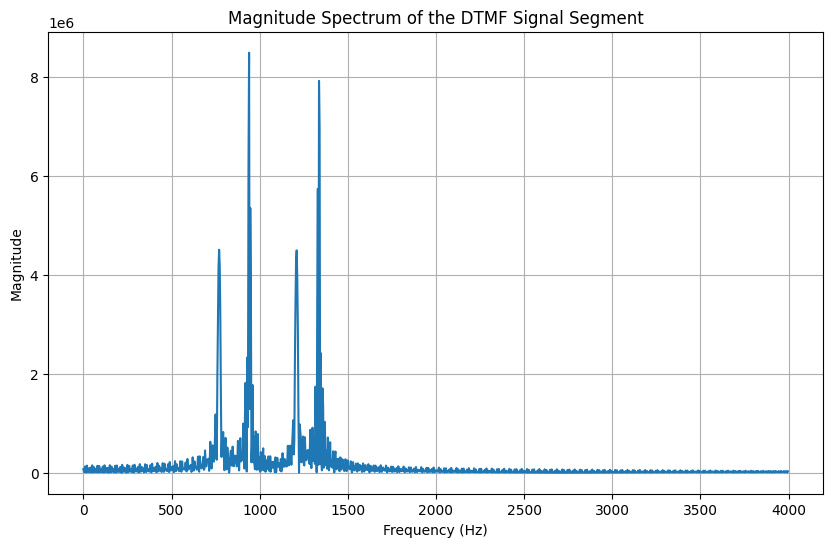

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

# Create fig directory if it doesn't exist
if not os.path.exists('fig'):
    os.makedirs('fig')

# Read the DTMF signal from the WAV file
fs, signal = wavfile.read('dtmf.wav')

# Define the duration of the segment to plot (300 ms)
segment_duration = 0.3  # seconds
segment_samples = int(segment_duration * fs)

# Extract the segment
segment = signal[:segment_samples]

# Plot the segment
time = np.arange(segment_samples) / fs
plt.figure(figsize=(10, 6))
plt.plot(time, segment)
plt.title('300 ms Segment of DTMF Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.savefig('fig/ex4_a_dtmf_segment.png')
plt.show()

# Perform a Fourier Transform to identify the frequencies
frequencies = np.fft.fftfreq(segment_samples, 1/fs)
spectrum = np.fft.fft(segment)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:segment_samples // 2], np.abs(spectrum[:segment_samples // 2]))
plt.title('Magnitude Spectrum of the DTMF Signal Segment')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.savefig('fig/ex4_a_dtmf_spectrum.png')
plt.show()


(b) Compute the spectrum for the whole signal length using the MATLAB command fft. Plot the magnitude of the spectrum. Label the axes correctly, with the frequency axis scale in $\mathrm{Hz}$ (Hint: the frequency values given in Tab. 1 should be visible at the correct position on the frequency axis).


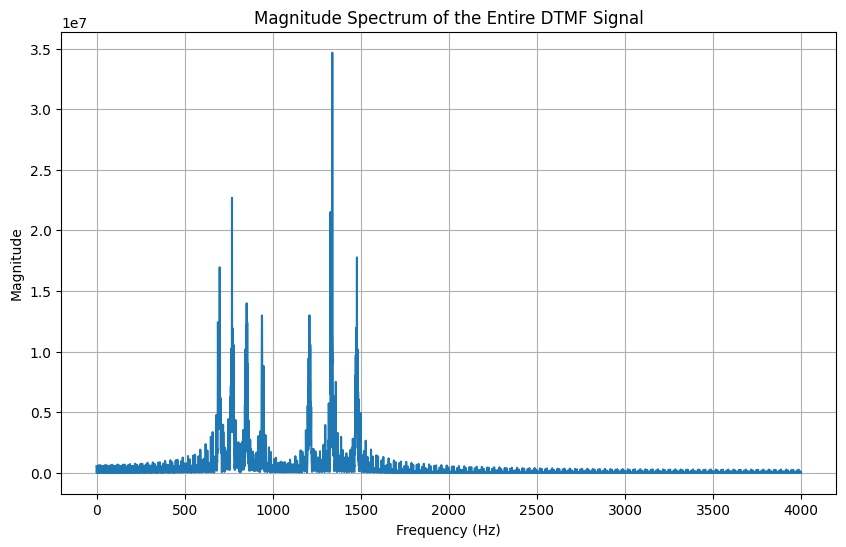

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

# Create fig directory if it doesn't exist
if not os.path.exists('fig'):
    os.makedirs('fig')

# Read the DTMF signal from the WAV file
fs, signal = wavfile.read('dtmf.wav')

# Compute the FFT for the whole signal length
spectrum = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1/fs)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies) // 2], np.abs(spectrum[:len(frequencies) // 2]))
plt.title('Magnitude Spectrum of the Entire DTMF Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.savefig('fig/ex4_b_dtmf_spectrum.png')
plt.show()


(c) Now the so-called short-time Fourier Transform (STFT) should be implemented. To this end, the total signal is grouped into overlapping blocks of a specified length, and each block is transformed individually into frequency domain. Additionally, the individual blocks should be filtered using a Hamming window (MATLAB command hamming) for improving the spectral illustration.

- Implement the generation of the signal blocks given the total signal. Every block should have a length of 256 samples. Use an overlapping factor of 2, i.e., every block is overlapping with its preceding block by half the signal length. The last block should also have a length of 256 , i.e., if not enough samples from the total signal are left to obtain a block of length 256 , append the appropriate number of zeros.
- Every block should be multiplied with a Hamming window. The window can be generated with the MATLAB command hamming.
- Transform the windowed blocks to frequency domain using the FFT to obtain the Fourier transformed blocks (FTBs).
- Plot a 2d diagram showing the FTBs. For this purpose, consider which frequency values have to be displayed on the frequency axis, and which time values have to be plotted on the time axis, i.e., which frequency range has been regarded with the FFTs and at which points in time have the FFTs of the individual blocks been computed? Generate two MATLAB vectors $f$ _stft and $t$ _stft, which contain the appropriate frequency and time values, respectively. Then, plot the diagram containing the magnitude of the STFT result using the MATLAB command surface ( $t$ stft, f_stft, abs(stft_mtx)), where stft_mtx is the matrix containing the individual FTBs. Display the amplitude information with the command colorbar. The STFT magnitude diagram in your protocol should look similar as in Fig. 2 (the symbol sequence might not be the same), where in Fig. 2 only the frequency range 0 $2000 \mathrm{~Hz}$ is shown.

![](https://cdn.mathpix.com/cropped/2024_05_20_fb408b21a3cafdbd1f66g-3.jpg?height=662&width=848&top_left_y=1916&top_left_x=570)

Figure 2 STFT magnitude of a DTMF sequence.

/var/folders/bt/2nhmyw717njc3db3_54g8yb80000gn/T/ipykernel_95367/217433383.py:17: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = hamming(block_length)  # Hamming window


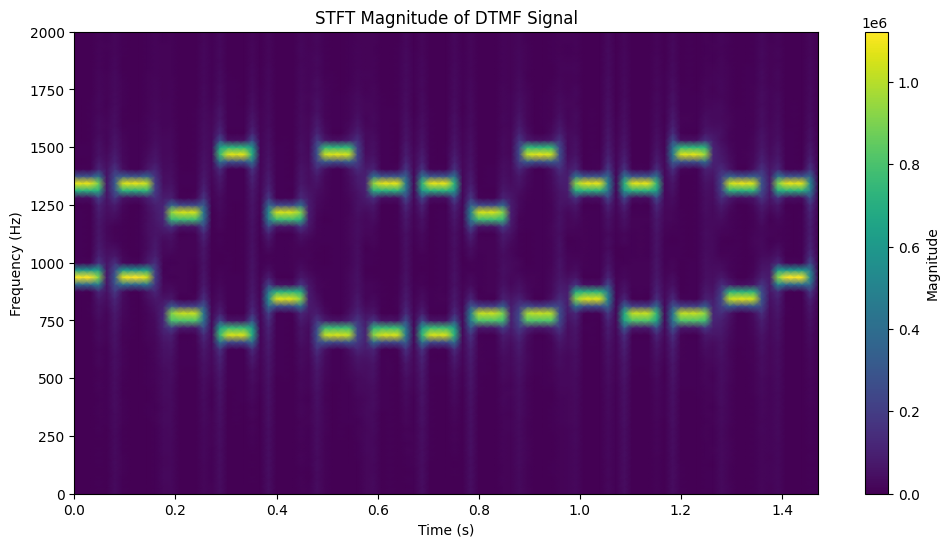

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import hamming
import os

# Create fig directory if it doesn't exist
if not os.path.exists('fig'):
    os.makedirs('fig')

# Read the DTMF signal from the WAV file
fs, signal = wavfile.read('dtmf.wav')

# Parameters for STFT
block_length = 256  # Block length
overlap = block_length // 2  # Overlapping factor of 2
window = hamming(block_length)  # Hamming window

# Pad the signal with zeros if necessary
padding_length = (block_length - len(signal) % block_length) % block_length
padded_signal = np.append(signal, np.zeros(padding_length))

# Generate signal blocks
num_blocks = (len(padded_signal) - overlap) // (block_length - overlap)
blocks = np.zeros((num_blocks, block_length))

for i in range(num_blocks):
    start = i * (block_length - overlap)
    end = start + block_length
    blocks[i, :] = padded_signal[start:end] * window

# Compute the FFT for each block
ftbs = np.fft.fft(blocks, axis=1)

# Generate the time and frequency vectors for plotting
f_stft = np.fft.fftfreq(block_length, 1/fs)[:block_length // 2]
t_stft = np.arange(num_blocks) * (block_length - overlap) / fs

# Plot the STFT magnitude
plt.figure(figsize=(12, 6))
plt.pcolormesh(t_stft, f_stft, np.abs(ftbs[:, :block_length // 2].T), shading='gouraud')
plt.title('STFT Magnitude of DTMF Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude')
plt.ylim(0, 2000)  # Limit the frequency range to 0-2000 Hz
plt.savefig('fig/ex4_c_stft_magnitude.png')
plt.show()


(d) Perform the same steps as in (c), but without multiplying the signal blocks by a Hamming window. How does the resulting magnitude diagram of the STFT differ to the one computed in (c)? How is the effect called that causes this difference?


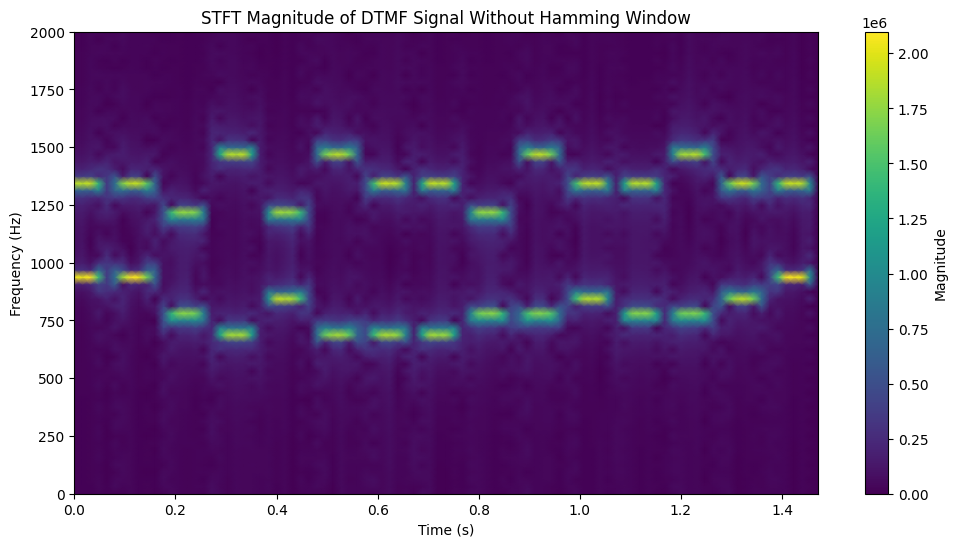

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

# Create fig directory if it doesn't exist
if not os.path.exists('fig'):
    os.makedirs('fig')

# Read the DTMF signal from the WAV file
fs, signal = wavfile.read('dtmf.wav')

# Parameters for STFT
block_length = 256  # Block length
overlap = block_length // 2  # Overlapping factor of 2

# Pad the signal with zeros if necessary
padding_length = (block_length - len(signal) % block_length) % block_length
padded_signal = np.append(signal, np.zeros(padding_length))

# Generate signal blocks
num_blocks = (len(padded_signal) - overlap) // (block_length - overlap)
blocks = np.zeros((num_blocks, block_length))

for i in range(num_blocks):
    start = i * (block_length - overlap)
    end = start + block_length
    blocks[i, :] = padded_signal[start:end]

# Compute the FFT for each block
ftbs = np.fft.fft(blocks, axis=1)

# Generate the time and frequency vectors for plotting
f_stft = np.fft.fftfreq(block_length, 1/fs)[:block_length // 2]
t_stft = np.arange(num_blocks) * (block_length - overlap) / fs

# Plot the STFT magnitude without Hamming window
plt.figure(figsize=(12, 6))
plt.pcolormesh(t_stft, f_stft, np.abs(ftbs[:, :block_length // 2].T), shading='gouraud')
plt.title('STFT Magnitude of DTMF Signal Without Hamming Window')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude')
plt.ylim(0, 2000)  # Limit the frequency range to 0-2000 Hz
plt.savefig('fig/ex4_d_stft_magnitude_no_hamming.png')
plt.show()


(e) On basis of the plotted diagram in (c), determine the symbol sequence that has been used for generating the total signal.


(f) Answer the following questions:

- What is the essential difference between the diagrams plotted in (b) and (c), and what becomes apparent in the diagram in (c) that cannot be observed from the diagram in (b)?
- Give an example for an application of the STFT and describe it briefly.


## Exercise 5 Window effects of the DFT (20\%)

Let us consider a signal consisting of two cosine oscillations with close frequencies. The actually infinite signal is time limited by windowing it once with a rectangular window and once with a Hamming window of length N. Generate the signal in MATLAB as follows:

```
N = 128;
n = 0:N-1;
w1 = 2*pi*0.1;
w2 = 2*pi*0.15;
x = cos(w1*n) + cos(w2*n);
```

Since $\mathrm{x}$ has only finite length, it implicitly has already been windowed with a rectangular window.

(a) Compute the (discrete) spectrum of $x$ and plot a line plot of its magnitude (MATLAB commands $f f t$, abs, stem). Do not forget to label the axes!


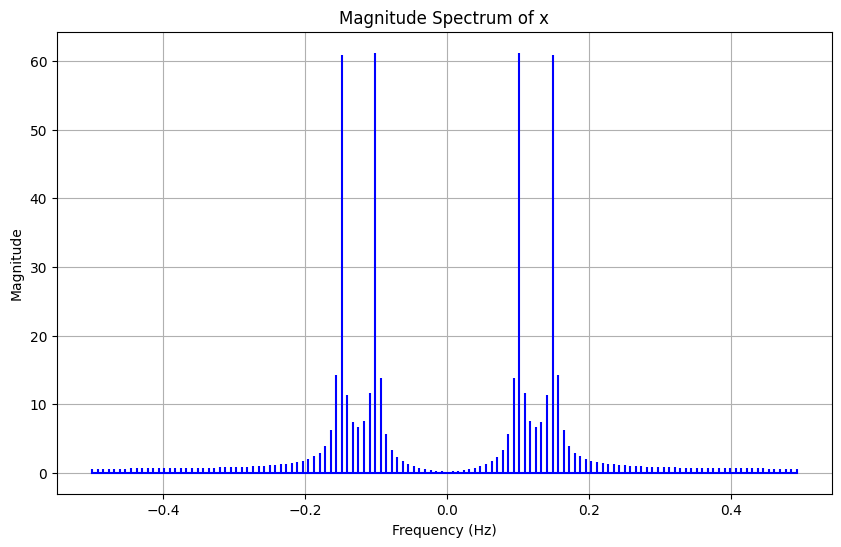

<Figure size 640x480 with 0 Axes>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 128
n = np.arange(N)
w1 = 2 * np.pi * 0.1
w2 = 2 * np.pi * 0.15

# Generate the signal
x = np.cos(w1 * n) + np.cos(w2 * n)

# Compute the FFT
X = np.fft.fft(x)

# Compute the magnitude of the spectrum
magnitude_spectrum = np.abs(X)

# Generate frequency axis
frequencies = np.fft.fftfreq(N, d=1.0)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.stem(frequencies, magnitude_spectrum, 'b', markerfmt=" ", basefmt="-b")
plt.title('Magnitude Spectrum of x')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Save the plot for LaTeX inclusion
plt.savefig('fig/ex5_a_magnitude_spectrum.png')


(b) Generate a Hamming window of length $N$ using the MatLAB command hamming. Multiply the Hamming window with the signal $\mathrm{x}$ to obtain the signal $\mathrm{y}$. Compute the spectrum of $\mathrm{y}$ and display its magnitude like in (a).


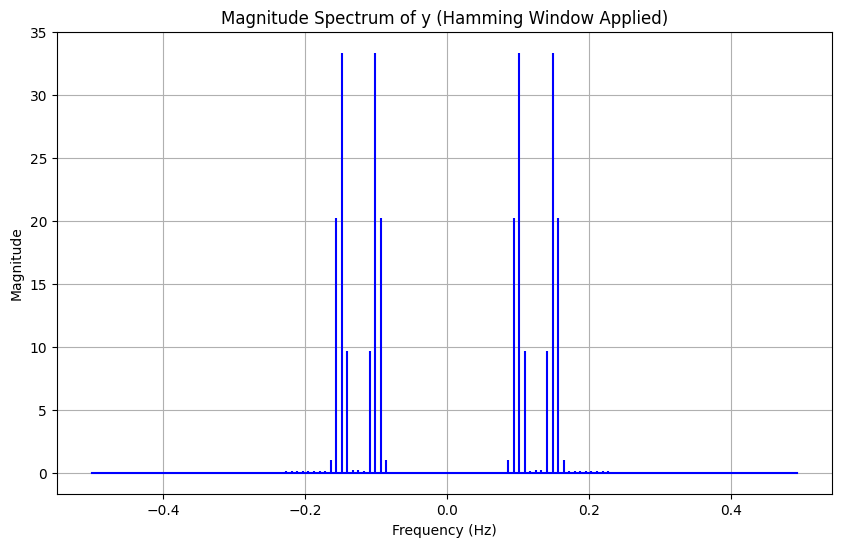

<Figure size 640x480 with 0 Axes>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 128
n = np.arange(N)
w1 = 2 * np.pi * 0.1
w2 = 2 * np.pi * 0.15

# Generate the signal
x = np.cos(w1 * n) + np.cos(w2 * n)

# Generate the Hamming window
hamming_window = np.hamming(N)

# Multiply the Hamming window with the signal x to obtain y
y = x * hamming_window

# Compute the FFT of y
Y = np.fft.fft(y)

# Compute the magnitude of the spectrum
magnitude_spectrum_y = np.abs(Y)

# Generate frequency axis
frequencies = np.fft.fftfreq(N, d=1.0)

# Plot the magnitude spectrum of y
plt.figure(figsize=(10, 6))
plt.stem(frequencies, magnitude_spectrum_y, 'b', markerfmt=" ", basefmt="-b")
plt.title('Magnitude Spectrum of y (Hamming Window Applied)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Save the plot for LaTeX inclusion
plt.savefig('fig/ex5_b_magnitude_spectrum_hamming.png')


(c) Compare and interpret the results from (a) and (b).


(d) Experiment with w1 and w2 (i.e., adjust their values) and find a setting, where the DFT/FFT yields the exact result. Explain why the DFT/FFT result is exact with the selected settings.



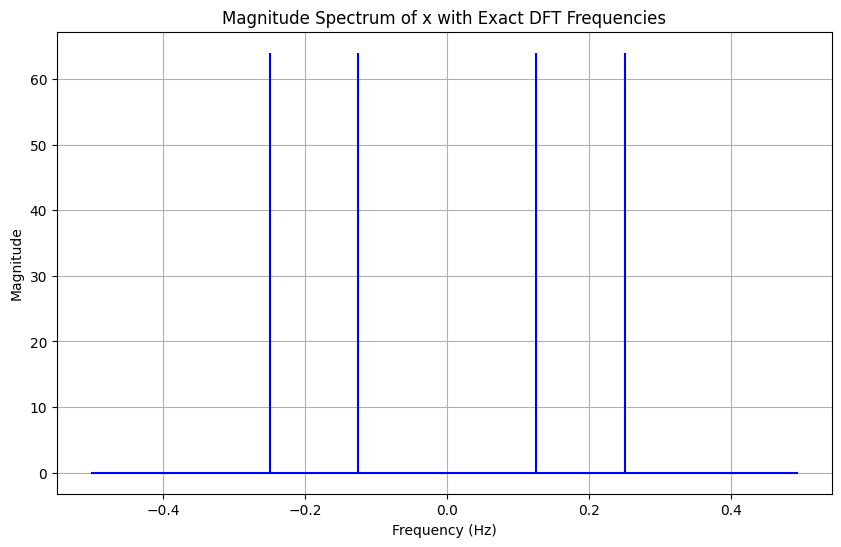

<Figure size 640x480 with 0 Axes>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 128
n = np.arange(N)

# Experiment with w1 and w2
w1 = 2 * np.pi * 0.125  # Corresponds to 1/8 of the sampling frequency
w2 = 2 * np.pi * 0.25   # Corresponds to 1/4 of the sampling frequency

# Generate the signal
x = np.cos(w1 * n) + np.cos(w2 * n)

# Compute the FFT
X = np.fft.fft(x)

# Compute the magnitude of the spectrum
magnitude_spectrum = np.abs(X)

# Generate frequency axis
frequencies = np.fft.fftfreq(N, d=1.0)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.stem(frequencies, magnitude_spectrum, 'b', markerfmt=" ", basefmt="-b")
plt.title('Magnitude Spectrum of x with Exact DFT Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Save the plot for LaTeX inclusion
plt.savefig('fig/ex5_d_magnitude_spectrum_exact.png')
